# Bull / Bear / Side Market Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mplfinance as mpf

In [ ]:
# abandon
def classify_market_regime(df, high_window=20, low_window=20, threshold=0.2):
    df = df.copy()

    df['rolling_max'] = df['Close'].rolling(window=high_window).max()
    df['rolling_min'] = df['Close'].rolling(window=low_window).min()

    df['drawdown'] = (df['Close'] - df['rolling_max']) / df['rolling_max']
    df['runup'] = (df['Close'] - df['rolling_min']) / df['rolling_min']

    def label_regime(row):
        if row['drawdown'] <= -threshold:
            return 'Bear'
        elif row['runup'] >= threshold:
            return 'Bull'
        else:
            return 'Sideways'

    df['Regime'] = df.apply(label_regime, axis=1)
    return df

In [27]:
# === STEP 2: Plotting ===
def plot_market_regime_analysis(df, title='BTC Market Regime Classification'):
    df = df.copy()
    df.index = pd.to_datetime(df.index)

    ohlc = df.resample('1D').agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum',
            'ema_20d': 'last',
            'bb_upper_20d': 'last',
            'bb_lower_20d': 'last',
            'macd_12_26': 'last',
            'macd_sig_12_26': 'last',
            'macd_hist_12_26': 'last',
            'rsi_14d': 'last'
        }).dropna()

    # Prepare plot
    fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1, 0.8]})
    fig.suptitle(title)


    # 1. Candle with BB and EMA
    mpf.plot(ohlc, type='candle', ax=axs[0], style='charles', show_nontrading=True)
    axs[0].plot(ohlc.index, ohlc['ema_20d'], color='orange', label='EMA 20d')
    axs[0].plot(ohlc.index, ohlc['bb_upper_20d'], linestyle='--', color='skyblue', label='BB Upper')
    axs[0].plot(ohlc.index, ohlc['bb_lower_20d'], linestyle='--', color='skyblue', label='BB Lower')
    axs[0].legend()
    
    # Volume
    axs[1].bar(ohlc.index, ohlc['Volume'], color='gray', width=0.8)
    axs[1].set_ylabel('Volume')

    # 2. MACD
    axs[2].plot(ohlc.index, ohlc['macd_12_26'], label='MACD', color='purple')
    axs[2].plot(ohlc.index, ohlc['macd_sig_12_26'], label='Signal', color='orange')
    axs[2].bar(ohlc.index, ohlc['macd_hist_12_26'], color='gray', alpha=0.4, label='MACD Hist')
    axs[2].legend()
    axs[2].set_ylabel('MACD')

    # 3. RSI
    axs[3].plot(ohlc.index, ohlc['rsi_14d'], color='navy', label='RSI')
    axs[3].axhline(70, color='red', linestyle='--', linewidth=0.5)
    axs[3].axhline(30, color='green', linestyle='--', linewidth=0.5)
    axs[3].legend()
    axs[3].set_ylabel('RSI')
    

    # 4. Price with context
    axs[4].plot(ohlc.index, ohlc['Close'], label='Close Price', color='black')
    axs[4].set_ylabel('Price')
    axs[4].legend()

    plt.tight_layout()
    plt.show()


In [29]:
df_march = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-03_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')


## March
### Bull

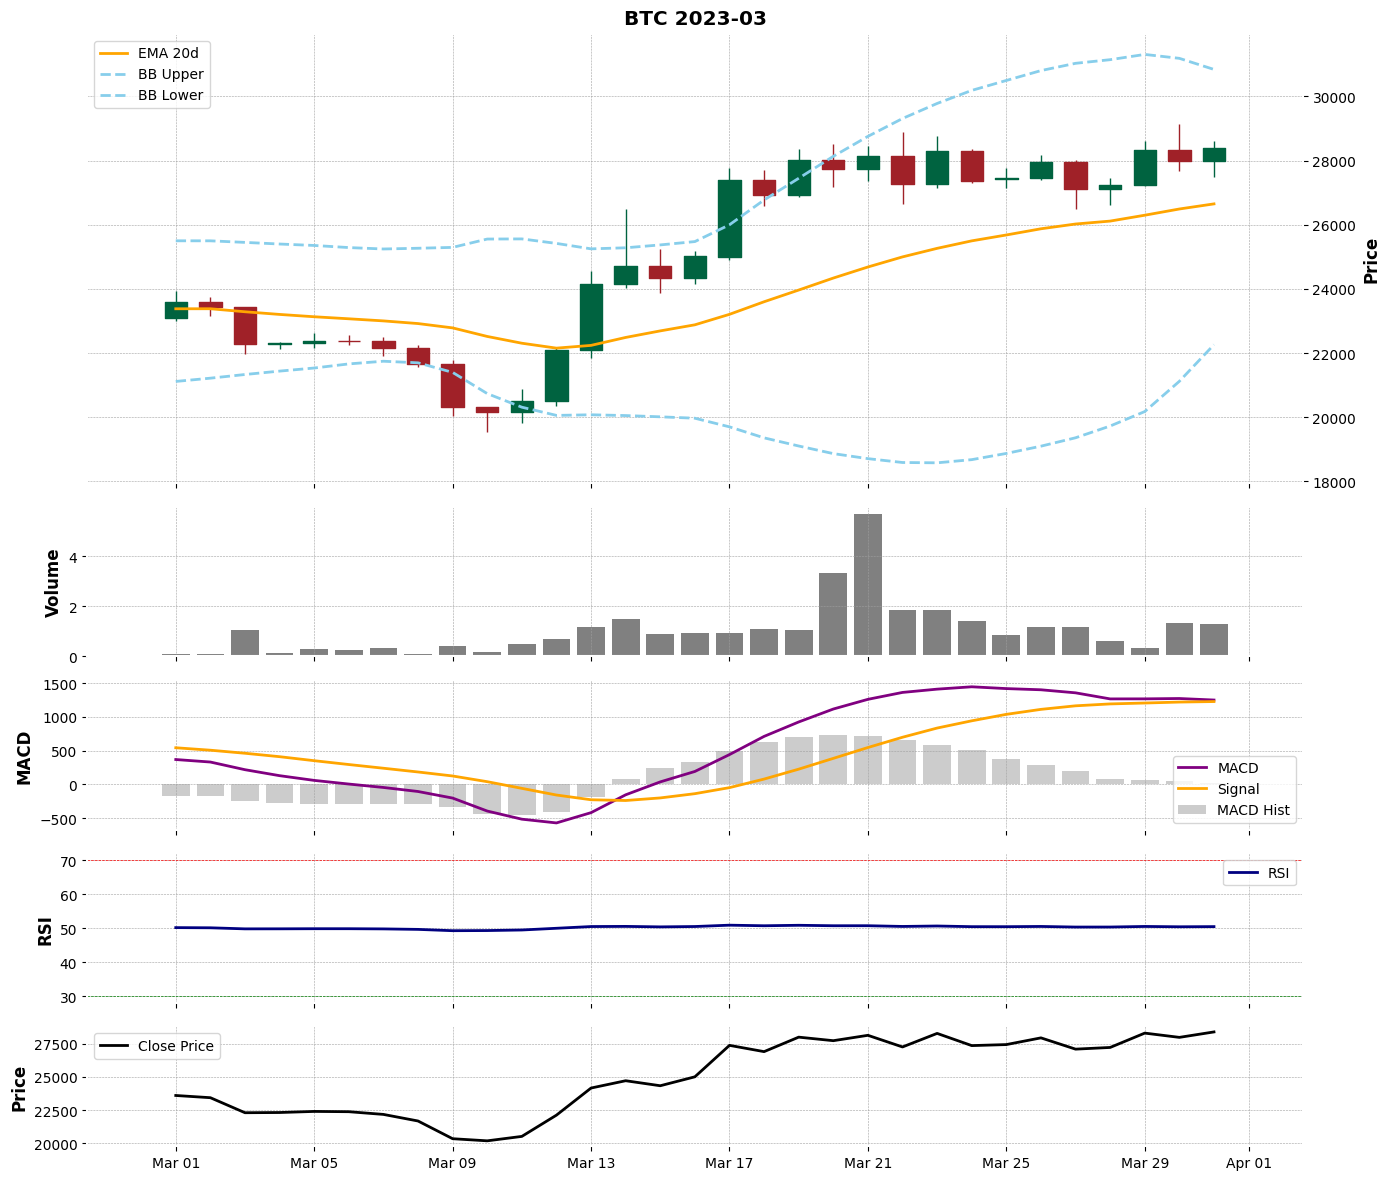

In [30]:
df = classify_market_regime(df_march, high_window=20, low_window=20)
plot_market_regime_analysis(df_march, title='BTC 2023-03')

## April
### Side

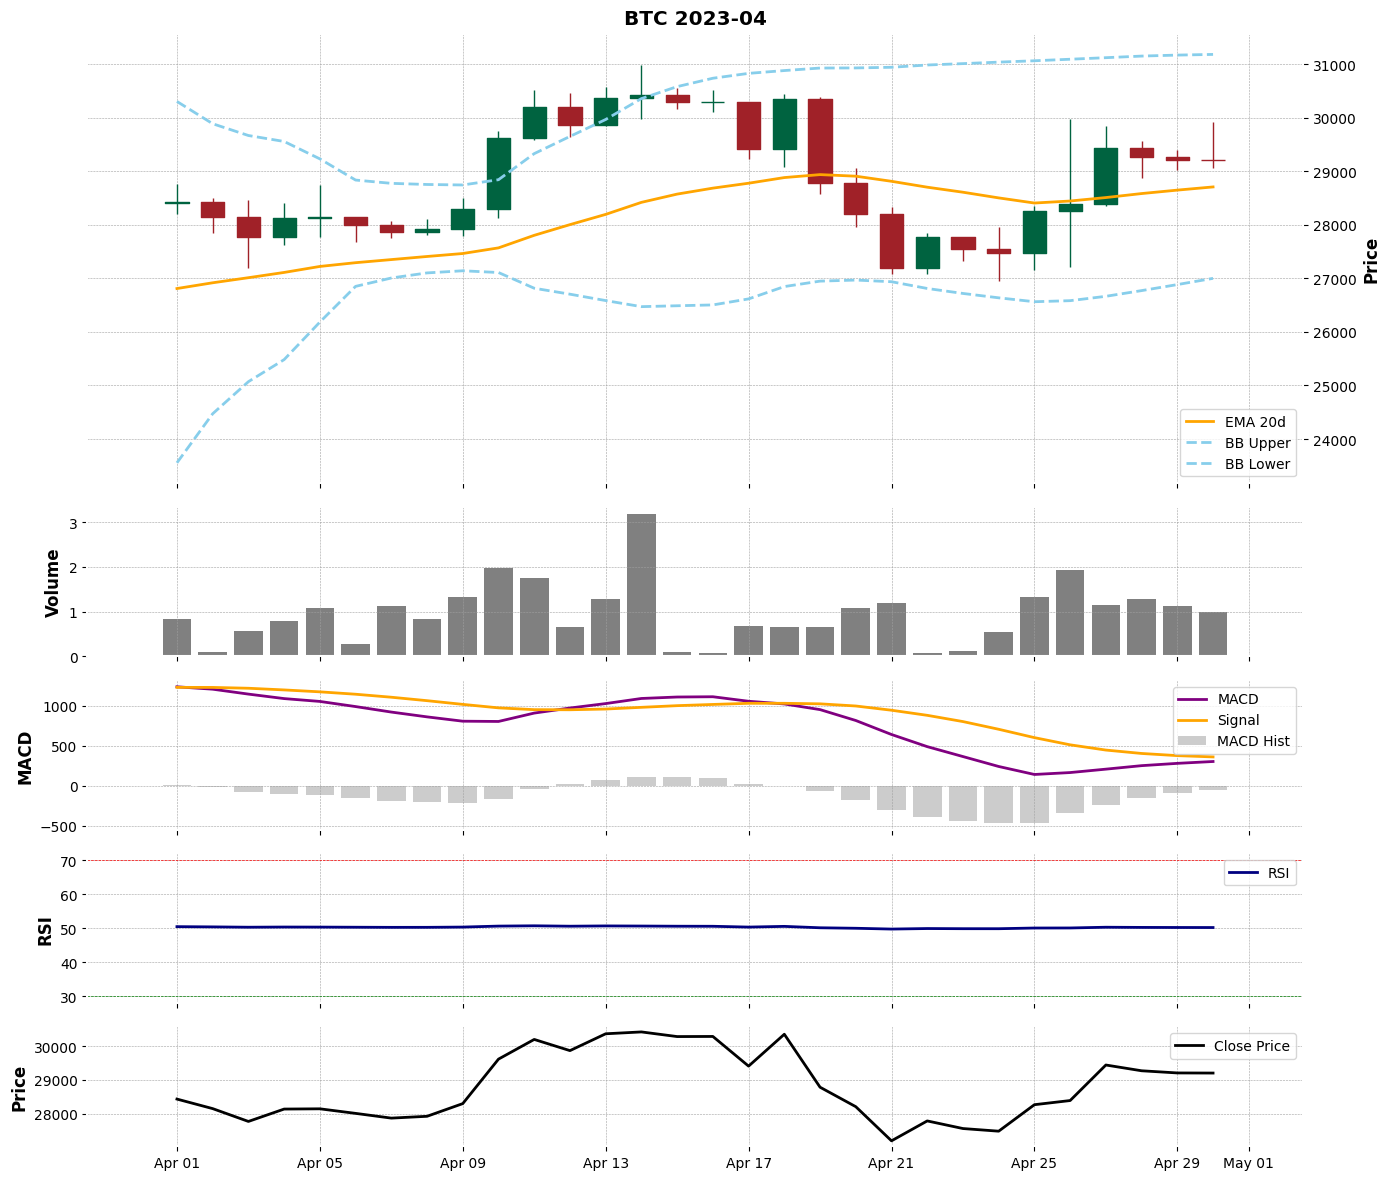

In [32]:
df_april = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-04_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_april, title='BTC 2023-04')

## May
### Bear

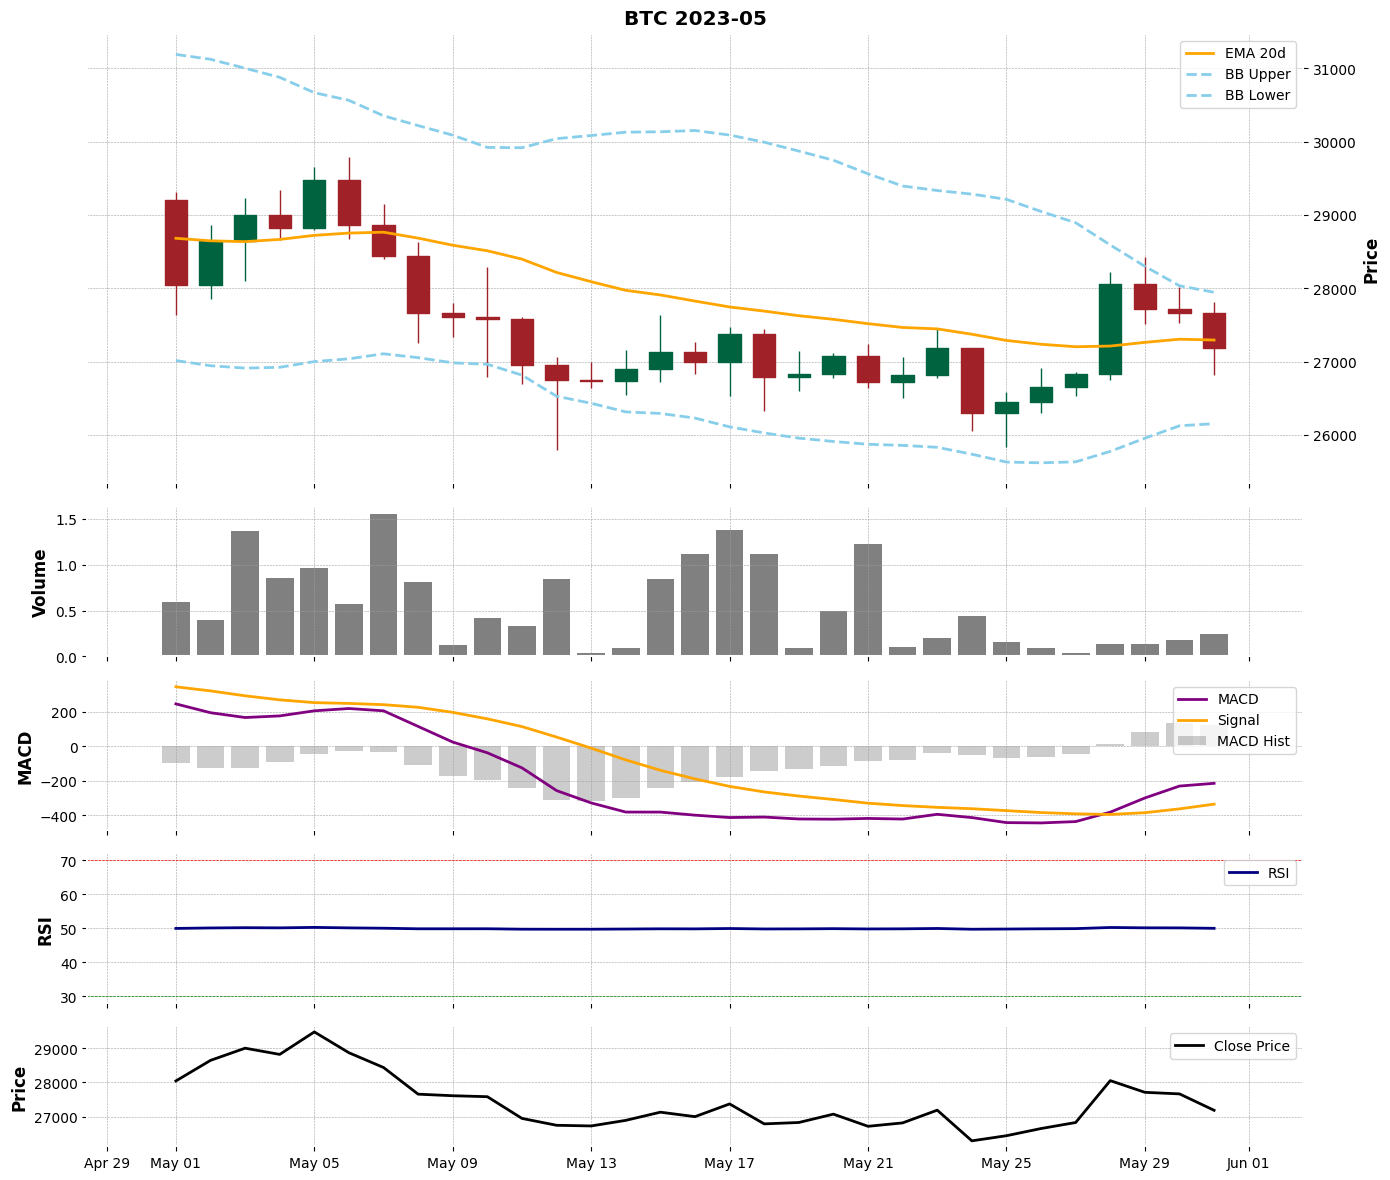

In [33]:
df_may = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-05_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_may, title='BTC 2023-05')

## June
### Bull

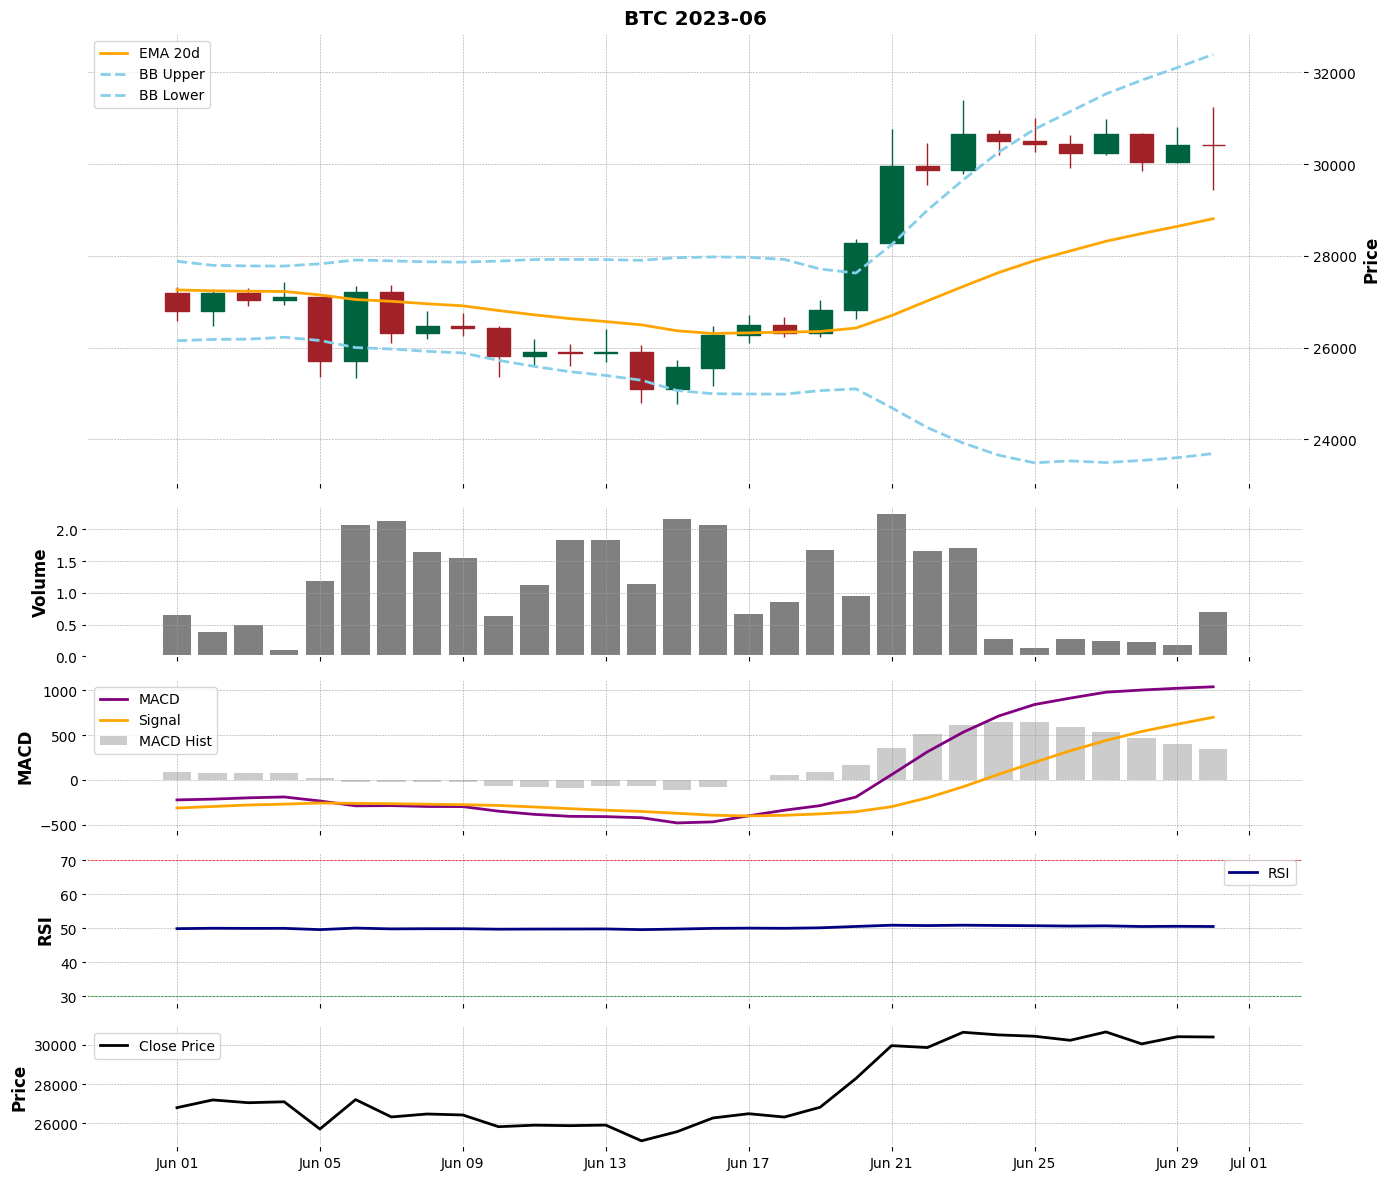

In [34]:
df_june = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-06_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_june, title='BTC 2023-06')

## July
### Side

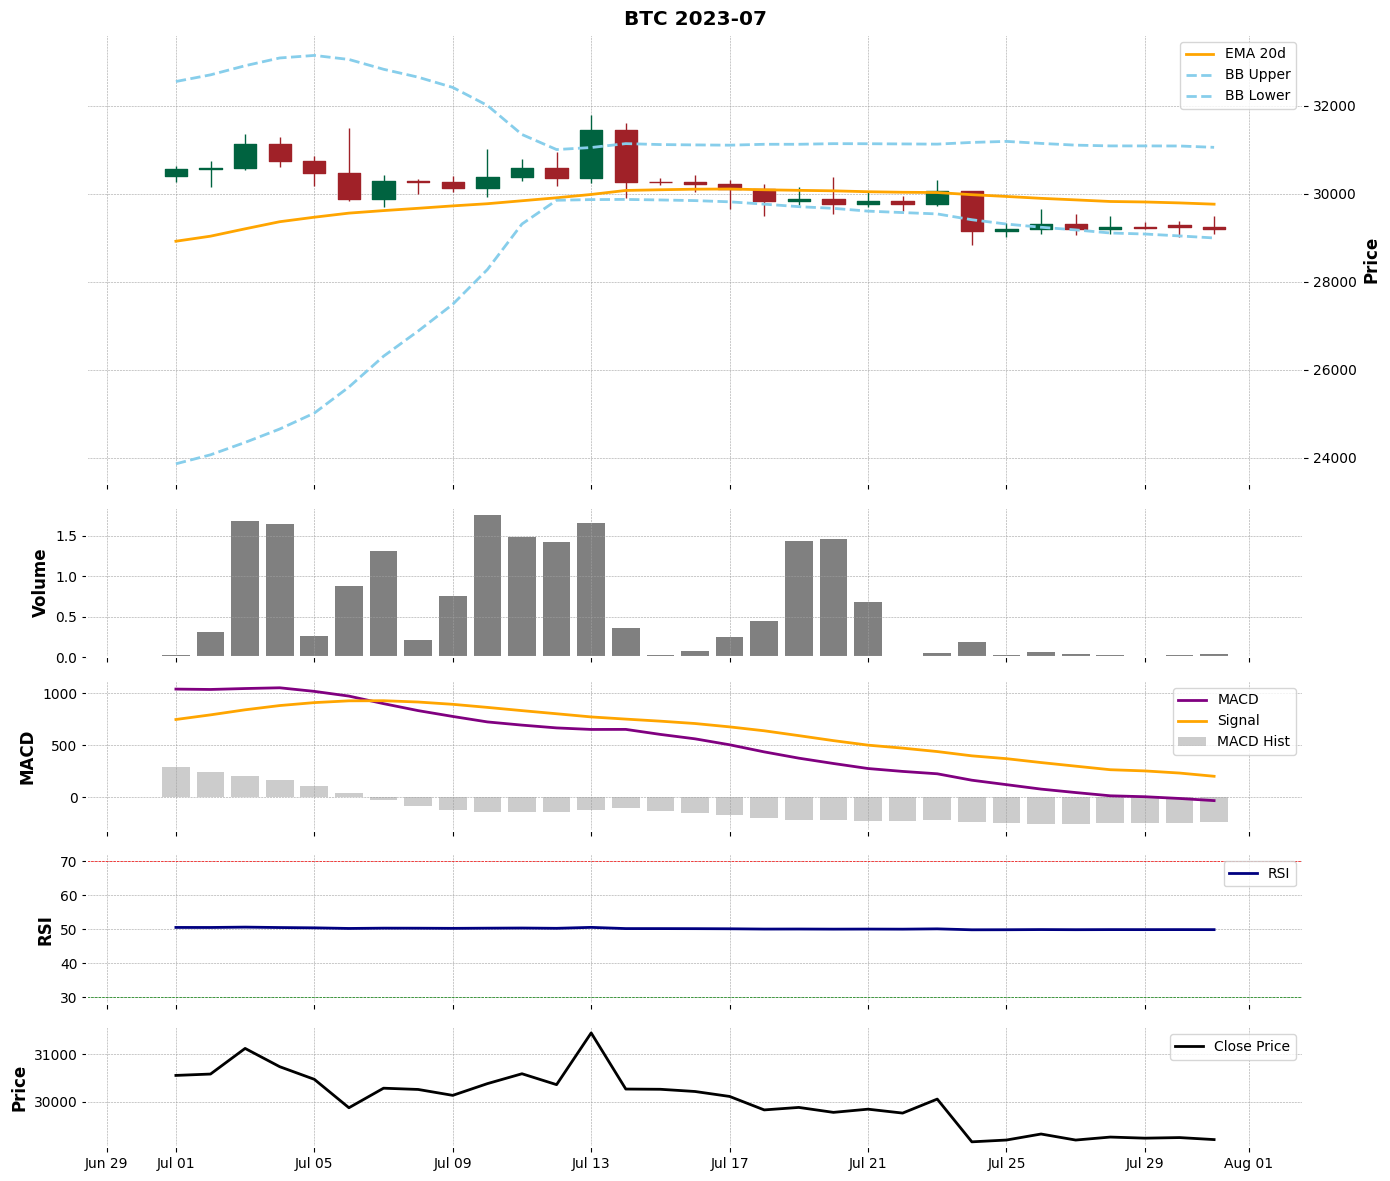

In [35]:
df_july = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-07_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_july, title='BTC 2023-07')

## August
### Bear

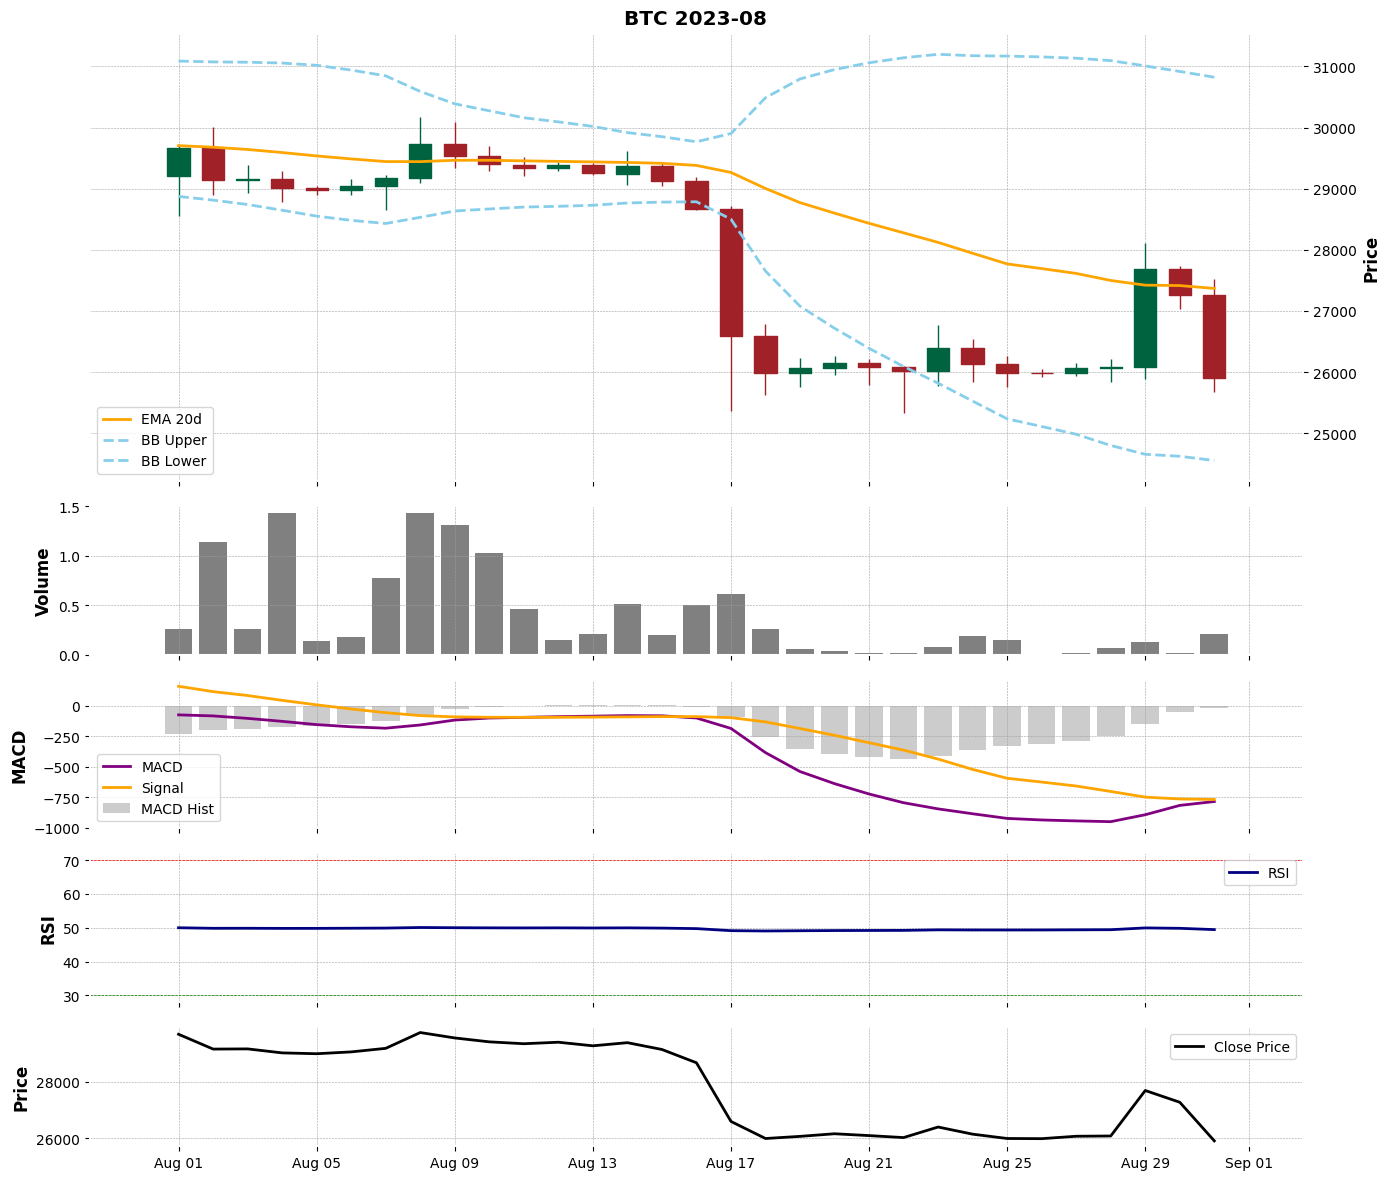

In [36]:
df_august = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-08_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_august, title='BTC 2023-08')

## September
### Side

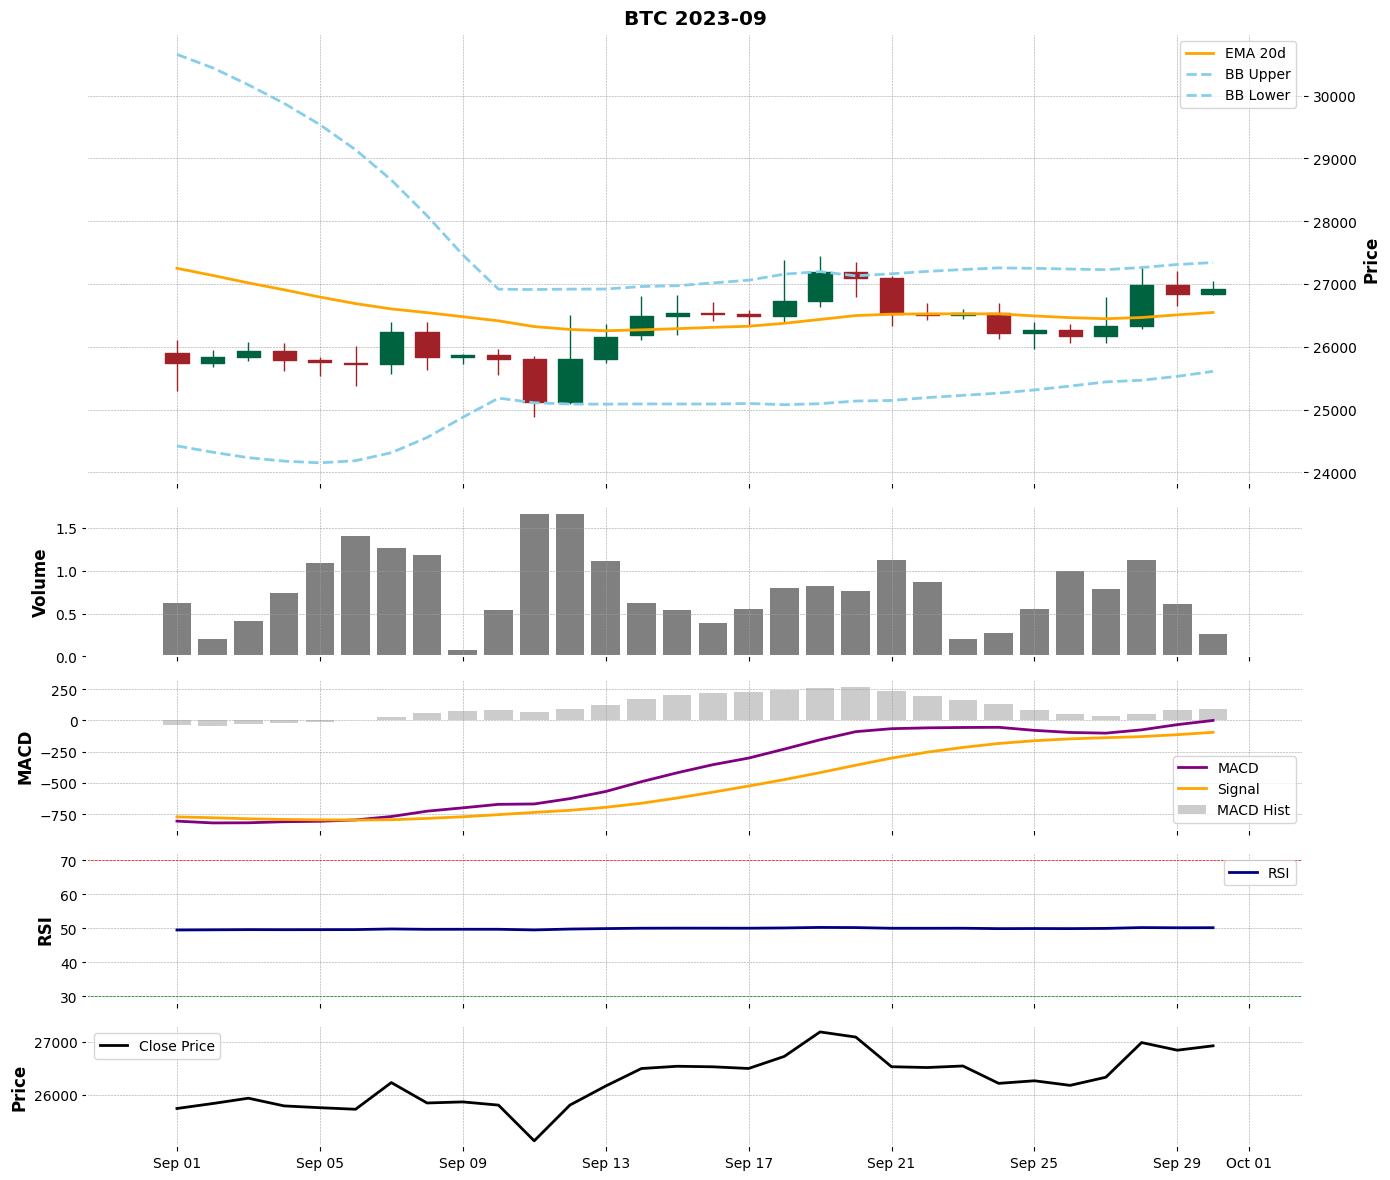

In [37]:
df_september = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-09_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_september, title='BTC 2023-09')

## October
### Bull

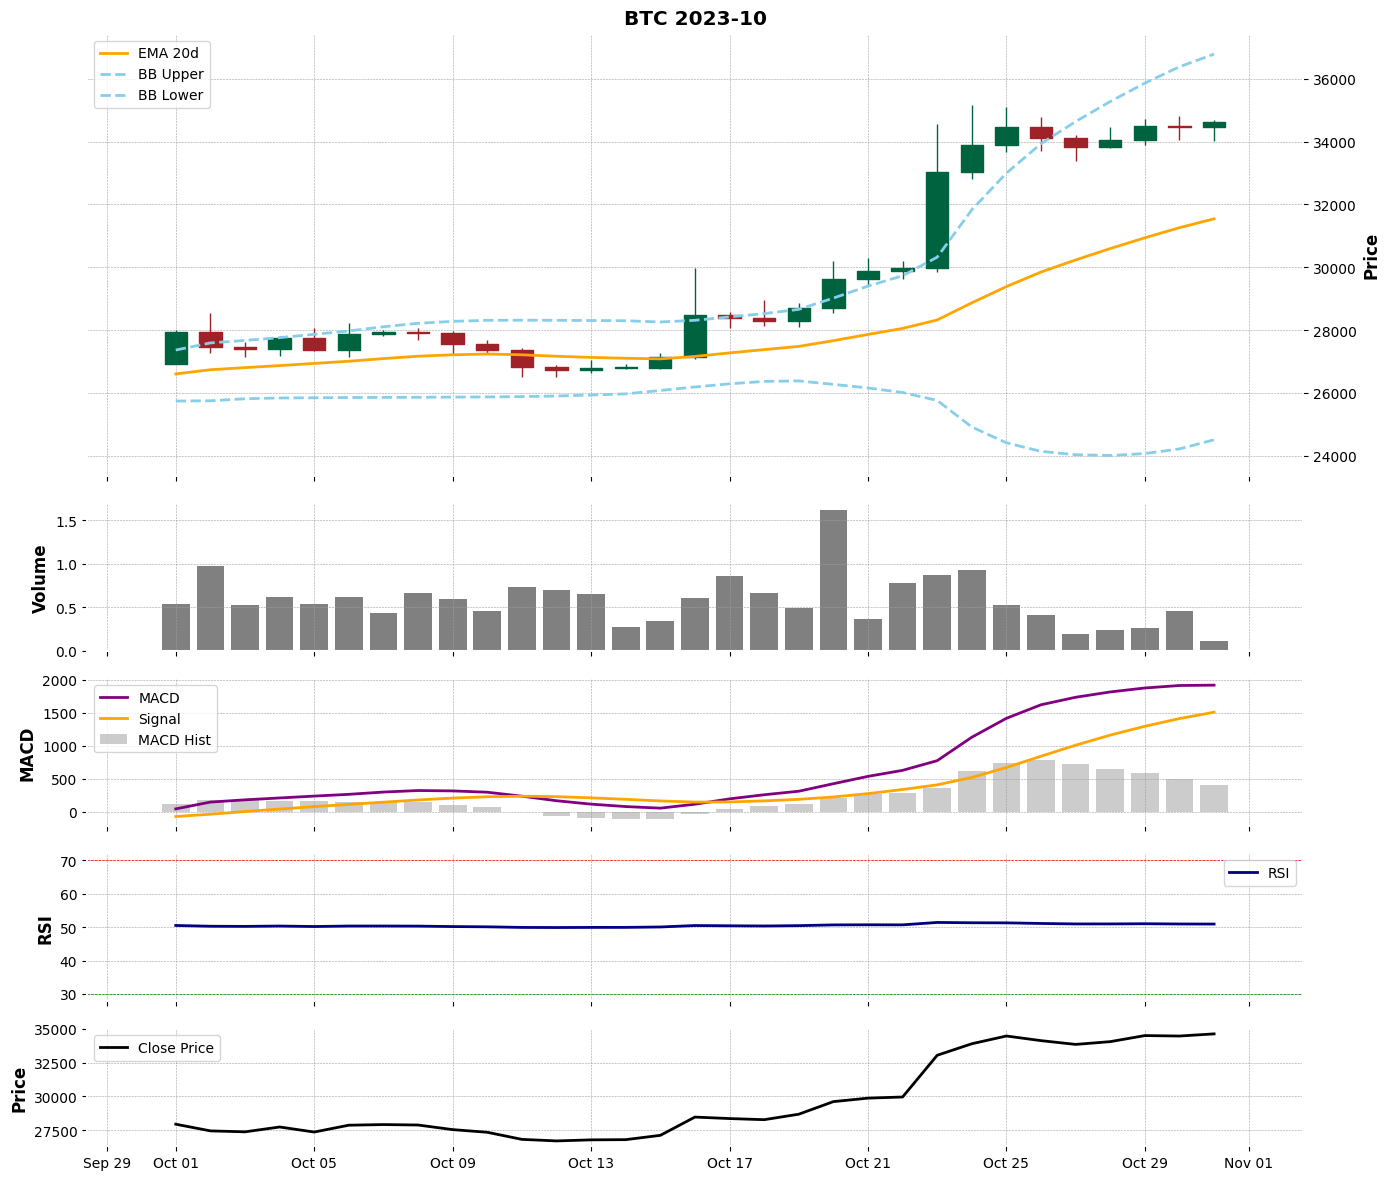

In [38]:
df_october = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-10_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_october, title='BTC 2023-10')

## November
### Side

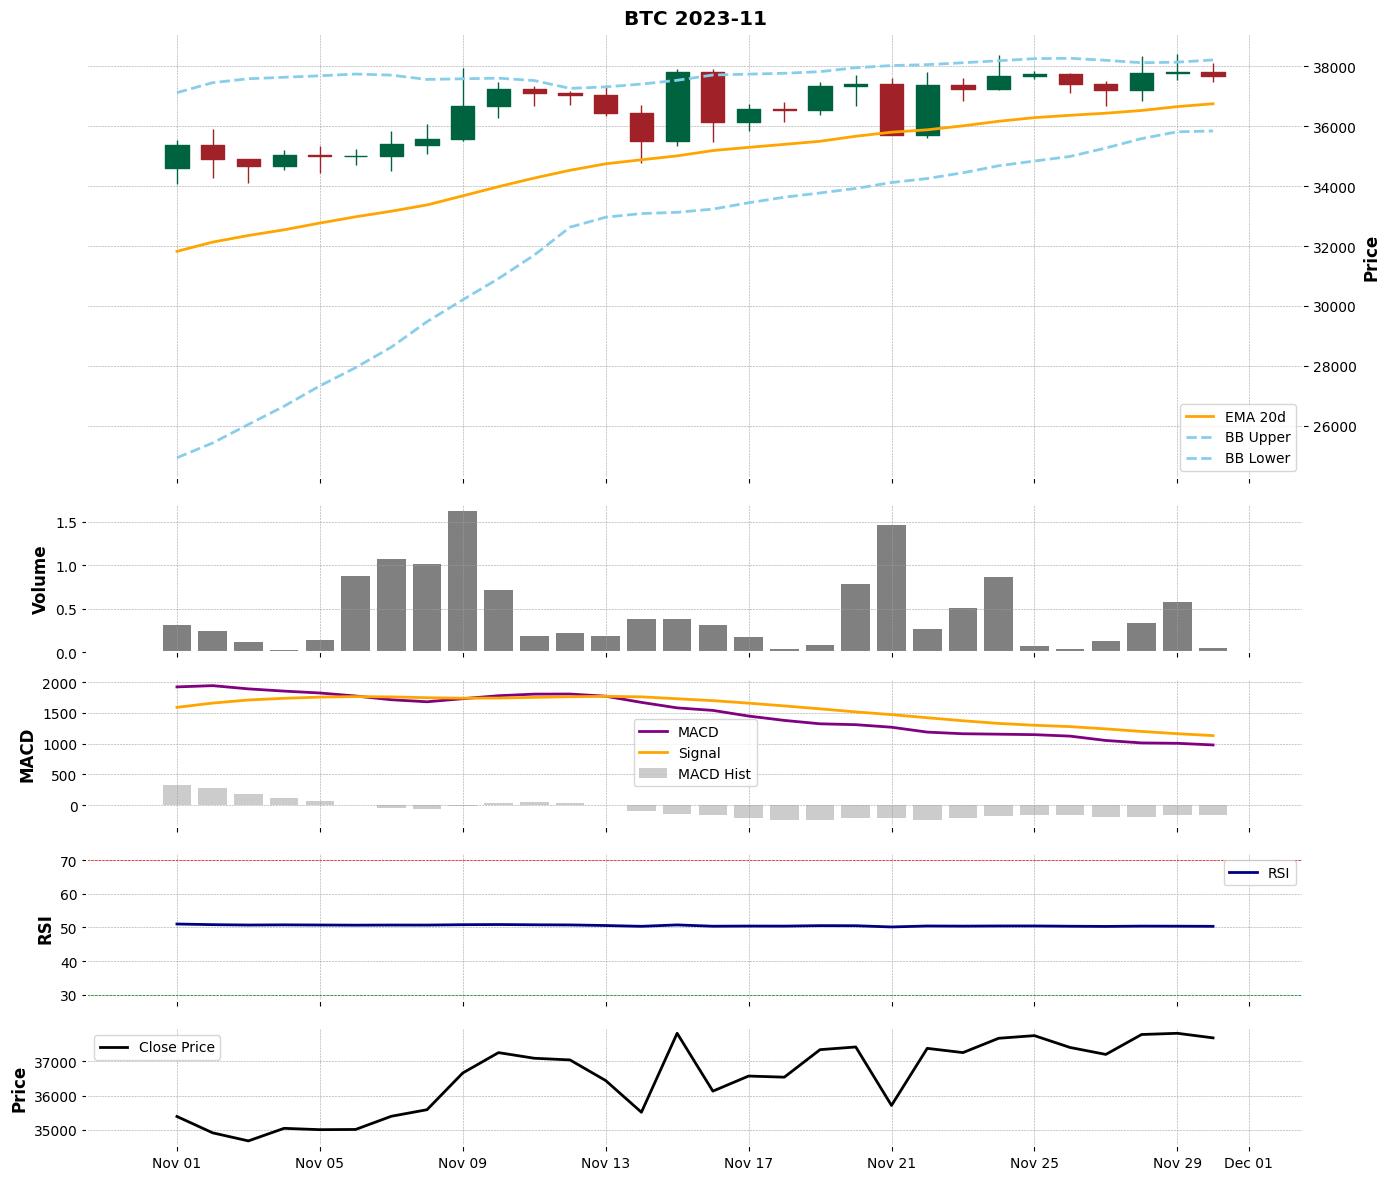

In [39]:
df_november = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-11_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_november, title='BTC 2023-11')

## December
### Side

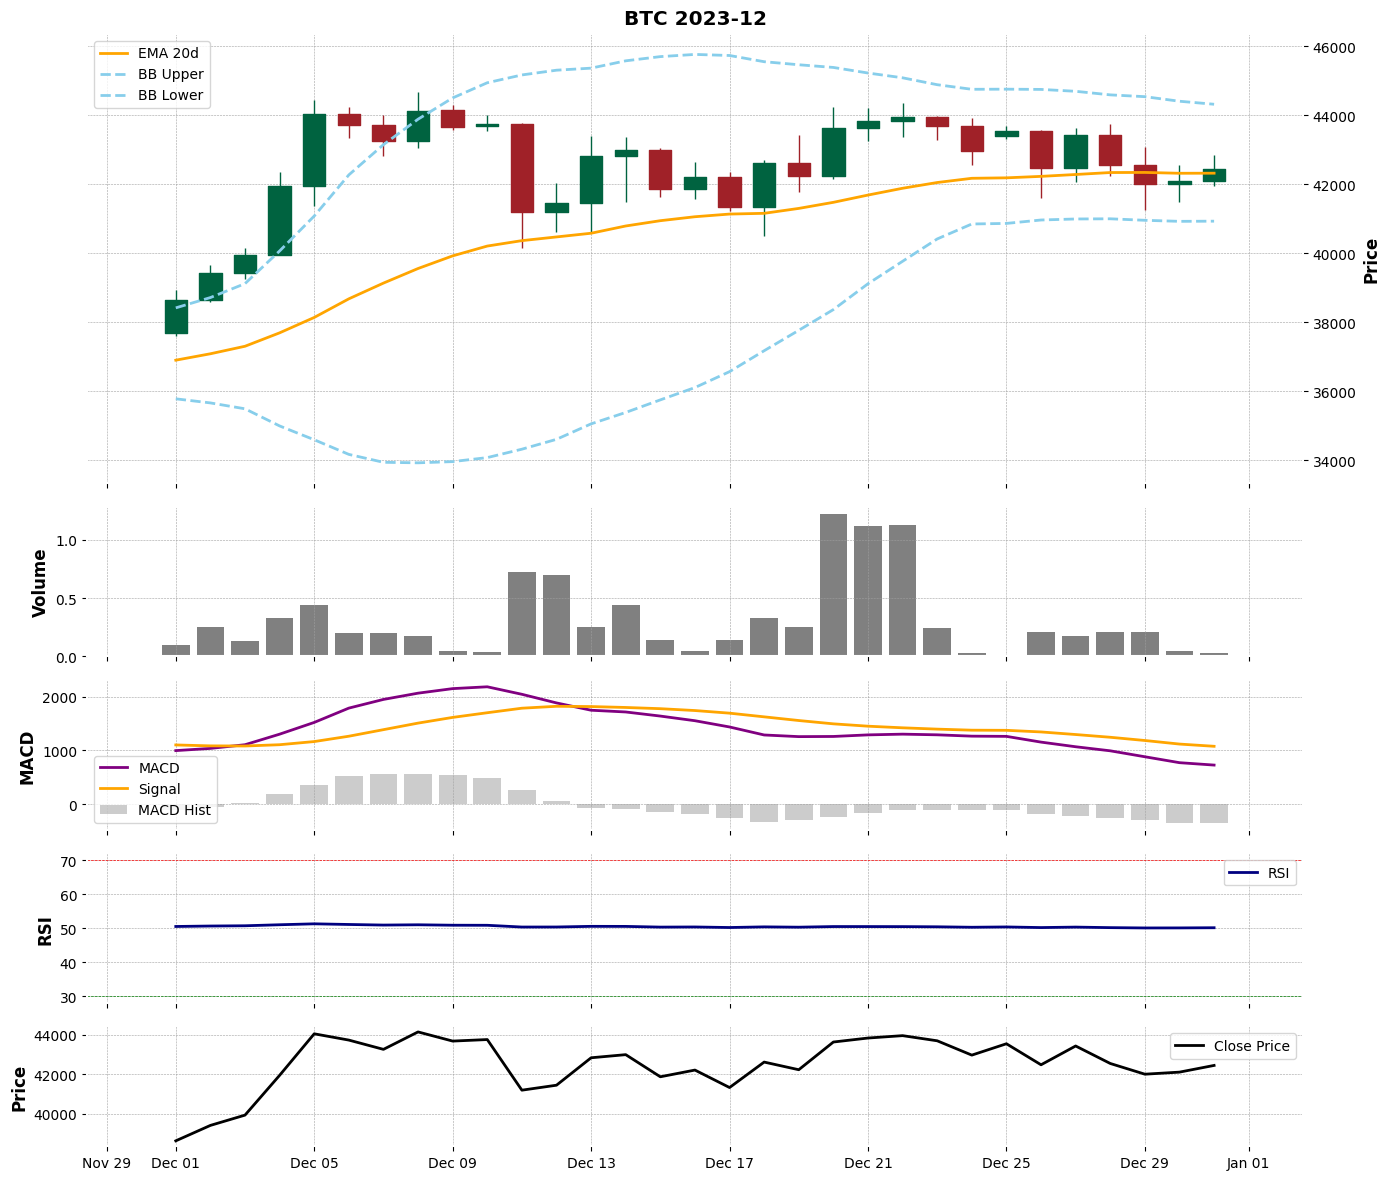

In [40]:
df_december = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTC_montly/btc_2023-12_2023.csv', parse_dates=['Timestamp'], index_col='Timestamp')
plot_market_regime_analysis(df_december, title='BTC 2023-12')